<a href="https://colab.research.google.com/github/ackleely/CSST102-3A/blob/main/3A-ORELLANO-EXER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercises for K-Nearest Neighbors (KNN) and Logistic Regression on Breast Cancer Diagnosis Dataset**





## **Exercise 1: Data Exploration and Preprocessing**



**1. Load and Explore the Data:**

In [ ]:
import pandas as pd
#Displaying the 10 rows
df = pd.read_csv('/content/Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
print(df.head(10))

#check for missing values
print(df.isnull().sum)

#Descriptive statistics
print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

**Task: Summarize the dataset:**

In [ ]:
#Number of instances and features
print(f'Instances: {df.shape[0]}, Features: {df.shape[1]}')

#Missing values
print(df.isnull().sum)

Instances: 569, Features: 33
<bound method DataFrame.sum of         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False      False        False         False           False      False   
4    False      False        False         False           False      False   
..     ...        ...          ...           ...             ...        ...   
564  False      False        False         False           False      False   
565  False      False        False         False           False      False   
566  False      False        False         False           False      False   
567  False      False        False         False           False      False   
568  False      False        False         False           False      F

**Preprocessing:**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Drop irrelevant columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Convert diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Normalize features
scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)

**Train-Test Split:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

## **Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model**



**1. Train the KNN Classifier:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predict the test set
y_pred = knn.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]


**2. Experiment with Different n_neighbors:**

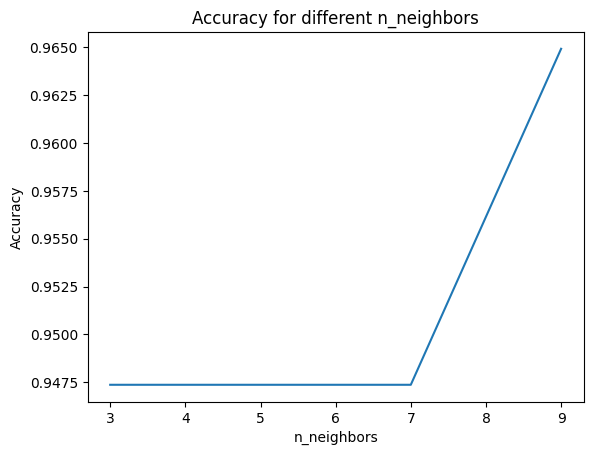

In [ ]:
import matplotlib.pyplot as plt


neighbors = [3, 5, 7, 9]
accuracies = []
for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

# Plot
plt.plot(neighbors, accuracies)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for different n_neighbors')
plt.show()

## **Exercise 3: Implementing Logistic Regression**



**1. Train Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
# Predict test set
y_pred_lr = logreg.predict(X_test)

# Accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## **Exercise 4: Hyperparameter Tuning and Cross-Validation**



**1. GridSearchCV for KNN:**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Best parameters and accuracy
print(grid_search.best_params_)
print(grid_search.best_score_)


{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9648351648351647


**2. Cross-Validation for Logistic Regression:**

In [ ]:
from sklearn.model_selection import cross_val_score

# k-fold cross-validation
cv_scores = cross_val_score(logreg, scaled_features, df['diagnosis'], cv=5)
print(f'Cross-validated accuracy: {cv_scores.mean()}')


Cross-validated accuracy: 0.9806862288464524


**2. Comparison of KNN and Logistic Regression: Compare their accuracy, precision, and F1-score based on the classification report.**



- **Accuracy**:
    - KNN achieved an accuracy of **95%**, while Logistic Regression performed slightly better with **96%** accuracy. This indicates that Logistic Regression correctly classified a higher percentage of instances in the test set.
- **Precision**:
    - For the positive class (malignant tumors), KNN had a precision of **93%**, whereas Logistic Regression had a higher precision of **97%**. This means that Logistic Regression made fewer false positive errors compared to KNN.
    - For the negative class (benign tumors), KNN had a precision of **97%**, while Logistic Regression had a precision of **95%**. KNN performed slightly better in this aspect.
- **F1-Score**:
    - The F1-score for the positive class was **93%** for KNN and **97%** for Logistic Regression, indicating that Logistic Regression has a better balance between precision and recall for detecting malignant tumors.
    - For the negative class, KNN's F1-score was **97%**, while Logistic Regression's was **95%**, showing that KNN performed slightly better in this regard.

## **Exercise 5: Decision Boundary Visualization**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)
# KNN and Logistic regression with PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])
logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])

LogisticRegression(max_iter=10000)

**Plot the Decision Boundary:

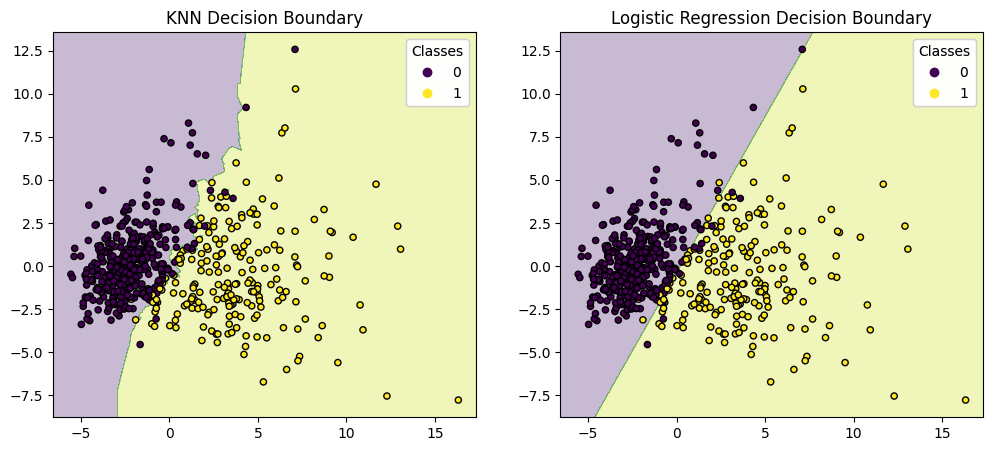

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Train KNN and Logistic Regression on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])

logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])

# Plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(knn_pca, X_pca, df['diagnosis'], axes[0], 'KNN Decision Boundary')
plot_decision_boundary(logreg_pca, X_pca, df['diagnosis'], axes[1], 'Logistic Regression Decision Boundary')
plt.show()
